# Fill in Title

Tutorial by Alex Heng and Nicholas Zhou

## Questions for Alex

* Where the fuck did you find the GDP data? We need to tell people in the tutorial
* Should we talk about how the removed countries are irrelevant? (just to say we considered different options)
* What should we say D is?
* significance in context

## Introduction
This is a tutorial that walks through the steps of the data lifecycle: data collection, data processing, exploratory analysis & data visualization, hypothesis testing & machine learning, and insight & policy decision. In data science, it is very important to understand data, process it, extract value from it, visualize it, and communicate it. Hopefully by the end of the tutorial, you walk away with a full understanding of the lifecycle and how to apply it!

## Context

There are people who try to argue that the United States has more immigrants originating from wealthier countries rather than poorer countries. We wanted to test whether or not this is true using the different steps of the data lifecycle. Looking at the GDP per capita between 2013 and 2015 for different countries, as well as their immigration rates (to the United States), we can test the validity of this argument.

**significance?**

## Setup
Before we begin, we should to import some packages that will be used for this tutorial.
1. Pandas: used to load the data and create the DataFrames
2. MatPlotLib: used for plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection

Of course, we want to start by loading in the data. There is a lot of data on the internet available for us to use.

The data set for GDP per capita that we used can be found from [Our World in Data](https://ourworldindata.org/economic-growth). In addition to the data set, this website has a lot of great information on the history of economic growth if you are interested in reading more about it. 

We also decided on using data from [Data.world](https://data.world/rflprr/us-immigration-statistics-15) for immigration rates. The website requires an account to access the data, but once you create one, you will be able to download the file dhs.xlsx. Notice the file has an Excel sheet extension. To convert that to a CSV (Comma-Separated Values) file, open it and go to Table3 at the bottom (it should be the page with Region of birth in cell A1). Then navigate to File -> Export -> Change File Type -> CSV. A popup will tell you that you cannot export multiple sheets. You can click OK and it will only save Table3, which is all we need.

Two other sources we considered were [The Department of Homeland Security](https://www.dhs.gov/profiles-lawful-permanent-residents) and [Migration Policy Institute](https://www.migrationpolicy.org/programs/data-hub/us-immigration-trends#source). While the DHS would have been a great source to get immigration numbers, we decided against it because the data for different years were separated into different files. We also could not use the Migration Policy Institute's data because the Excel sheet was formatted, so we could not convert to a CSV file.

Now that we have the data files, we can bring them into our notebook. Pandas has a function that allows us to read straight from a CSV file and put that data into a DataFrame. DataFrames are two-dimensional data structures similar to SQL tables or spreadsheet data representations. The two CSV files should be in the same folder as the notebook.

In [2]:
# use pandas to read the data
gdp_data = pd.read_csv("gdp-per-capita-maddison-2020.csv")

# allows us to get a preview of the DataFrame
gdp_data

,Entity,Code,Year,GDP per capita,145446-annotations
0,Afghanistan,AFG,1950,1156.00,NaN
1,Afghanistan,AFG,1951,1170.00,NaN
2,Afghanistan,AFG,1952,1189.00,NaN
3,Afghanistan,AFG,1953,1240.00,NaN
4,Afghanistan,AFG,1954,1245.00,NaN
...,...,...,...,...,...
19873,Zimbabwe,ZWE,2014,1594.00,NaN
19874,Zimbabwe,ZWE,2015,1560.00,NaN
19875,Zimbabwe,ZWE,2016,1534.00,NaN
19876,Zimbabwe,ZWE,2017,1582.37,NaN


In [3]:
# use pandas to read the data
immigration_data = pd.read_csv("dhs.csv")

# preview DataFrame
immigration_data

,Region of birth,2013,2014,2015
0,Total,"990,553","1,016,518","1,051,031"
1,Africa,"98,304","98,413","101,415"
2,Asia,"400,548","430,508","419,297"
3,Europe,"86,556","83,266","85,803"
4,North America,"315,660","324,354","366,126"
...,...,...,...,...
213,Yemen,"3,532","3,492","3,194"
214,Zambia,505,441,460
215,Zimbabwe,924,797,779
216,All other countries2,27,31,34


This is a great start! We now have GDP per capita  and immigration rates for countries during the years we wanted.

## Data Tidying

Next, we should tidy up the data so it's easier to work with. Before we can merge the two DataFrames, we should make sure that all the countries show up in both DataFrames.

In [4]:
# gets all the unique elements in the 'Entity' column
gdp_counts = gdp_data['Entity'].unique()
print("Unique entities in GDP data: " + str(len(gdp_counts)))

# gets all the unique elements in the 'Region of birth' column
imm_counts = immigration_data['Region of birth'].unique()
print("Unique regions in immigration data: " + str(len(imm_counts)))

Unique entities in GDP data: 178
Unique regions in immigration data: 216


### Consistent Countries
As you can see, the two DataFrames don't even contain the same number of unique entries. Because of this, we did all the work and found all the countries we should remove from each DataFrame. Let's start with the GDP per capita set. Below are the entries from the 'Entity' column that we want to remove from the GDP per capita set.

**Regions**<br>
* East Asia
* Eastern Europe
* Latin America
* Middle East
* South and South-East Asia
* Sub-Sahara Africa
* Western Europe
* Western Offshoots
* World

**Not Recognized**<br>
* Puerto Rico

**Former Countries**<br>
* Former USSR
* Former Yugoslavia

**Not in Immigration Data**<br>
* Palestine

**United States**<br>
* United States (we're not going to need the GDP/immigration rate for the US)

Pandas has a function to drop a row from the DataFrame. First we need a list of entries that should be removed. Then we can traverse the rows of the entire DataFrame and remove those that have the same 'Entity' names as one of the entries in the list.

In [5]:
# list of entries to remove
rows_to_drop = ['East Asia', 'Eastern Europe', 'Latin America', 'Middle East', 'South and South-East Asia', \
               'Sub-Sahara Africa', 'Western Europe', 'Western Offshoots', 'World', 'Puerto Rico', \
               'Former USSR', 'Former Yugoslavia', 'United States', 'Palestine']

# for every row in gdp_data
for i in range(0, len(gdp_data)):
    # if the value in the 'Entity' column can be found in the above list
    if gdp_data.loc[i].at["Entity"] in rows_to_drop:
        # remove it from the list
        gdp_data = gdp_data.drop(i)
        
gdp_data

,Entity,Code,Year,GDP per capita,145446-annotations
0,Afghanistan,AFG,1950,1156.00,NaN
1,Afghanistan,AFG,1951,1170.00,NaN
2,Afghanistan,AFG,1952,1189.00,NaN
3,Afghanistan,AFG,1953,1240.00,NaN
4,Afghanistan,AFG,1954,1245.00,NaN
...,...,...,...,...,...
19873,Zimbabwe,ZWE,2014,1594.00,NaN
19874,Zimbabwe,ZWE,2015,1560.00,NaN
19875,Zimbabwe,ZWE,2016,1534.00,NaN
19876,Zimbabwe,ZWE,2017,1582.37,NaN


For the immigration dataset, we'll be removing a lot more, since there were more unique entries in this set to begin with. Below are the entries in the 'Region of birth' column we would like to remove.

**Regions/Misc**<br>
* Total
* Africa
* Asia
* Europe
* North America
* Oceania
* South America
* Unknown
* Country of birth
* All other countries2

**Not in GDP per Capita Data**<br>
* American Samoa
* Anguilla
* Antigua-Barbuda
* Aruba
* Bahamas
* Belize
* Bermuda
* Bhutan
* British Virgin Islands
* Brunei
* Cayman Islands
* Curacao
* Eritrea
* Fiji
* French Polynesia
* Grenada
* Guyana
* Kiribati
* Kosovo
* Macau
* Maldives
* Palau
* Marshall Islands
* Micronesia, Federated States
* Monaco
* Montserrat
* New Caledonia
* Papua New Guinea
* Saint Kitts-Nevis
* Saint Vincent and the Grenadines
* Samoa
* Sint Maarten
* Solomon Islands
* Somalia
* South Sudan
* Suriname
* Tonga
* Turks and Caicos Islands

**Former Countries**<br>
* Netherlands Antilles (former)
* Serbia and Montenegro (former)
* Soviet Union (former)

**United States**<br>
* United States (we're not going to need the GDP/immigration rate for the US)

In [6]:
# list of regions to remove
drop_rows = ['Total', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown', \
            'Country of birth', 'American Samoa', 'Anguilla', 'Antigua-Barbuda', 'Aruba', 'Bahamas', 'Belize', 'Bermuda', \
            'Bhutan', 'British Virgin Islands', 'Brunei', 'Cayman Islands', 'Curacao', 'Eritrea', 'Fiji', \
            'French Polynesia', 'Grenada', 'Guyana', 'Kiribati', 'Kosovo', 'Macau', 'Maldives', 'Palau', \
            'Marshall Islands', 'Micronesia, Federated States', 'Monaco', 'Montserrat', 'Netherlands Antilles (former)', \
            'New Caledonia', 'Papua New Guinea', 'Saint Kitts-Nevis', 'Saint Vincent and the Grenadines', 'Samoa', \
            'Serbia and Montenegro (former)', 'Sint Maarten', 'Solomon Islands', 'Somalia', 'South Sudan', \
            'Soviet Union (former)', 'Suriname', 'Tonga', 'Turks and Caicos Islands', 'All other countries2', \
            'United States']

# actually remove (same method as before)
for i in range(0, len(immigration_data)):
    if immigration_data.loc[i].at['Region of birth'] in drop_rows:
        immigration_data = immigration_data.drop(i)

Now let's make sure we lined them up correctly.

In [7]:
gdp_counts = gdp_data['Entity'].unique()
print("Unique entities in GDP data: " + str(len(gdp_counts)))

imm_counts = immigration_data['Region of birth'].unique()
print("Unique regions in immigration data: " + str(len(imm_counts)))

Unique entities in GDP data: 164
Unique regions in immigration data: 164


### Consistent Names
In addition to not including all the same countries, there were also a few countries that had different names in the two datasets. We will have to standardize those.

In [8]:
# show the names in GDP data
print("Names in GDP per capita data:")
print(" ")
for i in gdp_counts:
    if i not in imm_counts:
        print(i)
        
print("\n***\n")

print("Names in immigration data:")
print(" ")
# show the names in immigration data
for j in imm_counts:
    if j not in gdp_counts:
        print(j)

Names in GDP per capita data:
 
Bosnia and Herzegovina
China
Congo
Czechia
Czechoslovakia
Democratic Republic of Congo
Eswatini
Myanmar
North Korea
North Macedonia
South Korea

***

Names in immigration data:
 
Bosnia-Herzegovina
Burma
China, People's Republic
Congo, Democratic Republic
Congo, Republic
Czech Republic
Czechoslovakia (former)
Korea, North
Korea, South1
Macedonia
Swaziland


Since we are looking at three years, it would be easier to work with the data if each column contained data for that year. For that reason, we will be merging the GDP per capita data into the immigration DataFrame. However, the names of the countries above are the more standard ones today (i.e. Myanmar is former Burma), we want to change the names in the immigration DataFrame to match the ones in the GDP per capita DataFrame.

In order to do this, we can usea  dictionary to map the old names (from the immigration DataFrame) to new names (from the GDP per capita DataFrame). Then, we will go through every 'Region of birth' entry in the immigration DataFrame, and update it if it has the same name as one of the key values in the dictionary.

In [9]:
# dictionary of immigration data names
mapping = {
    "Bosnia-Herzegovina": "Bosnia and Herzegovina",
    "Burma": "Myanmar",
    "China, People\'s Republic": "China",
    "Congo, Democratic Republic": "Democratic Republic of Congo",
    "Congo, Republic": "Congo", 
    "Czech Republic": "Czechia",
    "Czechoslovakia (former)": "Czechoslovakia", 
    "Korea, North": "North Korea",
    "Korea, South1":"South Korea",
    "Macedonia": "North Macedonia",
    "Swaziland": "Eswatini"
}

# for every country in immigration data
for i in immigration_data['Region of birth']:
    # if it is found in the mapping dictionary
    if i in mapping:
        # update it
        immigration_data.at[immigration_data[immigration_data['Region of birth'] == i].index[0], 'Region of birth']\
        = mapping[i]

### Merging DataFrames
Now we can finally merge the GDP per capita DataFrame into the immigration DataFrame. To do this, we create three new columns in our immigration DataFrame (one for each year). The columns will consist of the GDP per capita for that row's country according to the GDP per capita DataFrame.

In [10]:
for year in range(2013,2016):
    # empty list
    arr = []
    # for every entry in region of birth
    for i in immigration_data['Region of birth']:
        # add the corresponding GDP per capita for that country during that year
        arr.append(gdp_data.loc[gdp_data['Entity'] == i].loc[gdp_data['Year'] == year]['GDP per capita'].tolist()[0])
    # create a new column in the DataFrame using the list
    immigration_data[str(year) + ' GDP per capita'] = arr
    
immigration_data

,Region of birth,2013,2014,2015,2013 GDP per capita,2014 GDP per capita,2015 GDP per capita
10,Afghanistan,"2,196","10,527","8,328",2025.0,2022.0,1928.0
11,Albania,"3,186","3,828","4,653",9660.0,9808.0,10032.0
12,Algeria,"1,241","1,669","1,775",13494.0,13744.0,14004.0
14,Angola,143,148,154,8508.0,8673.0,8689.0
17,Argentina,"4,372","3,874","3,730",19873.0,19183.0,19502.0
...,...,...,...,...,...,...,...
211,Venezuela,"9,572","8,427","9,144",21429.0,20317.0,18802.0
212,Vietnam,"27,101","30,283","30,832",5200.0,5455.0,5763.0
213,Yemen,"3,532","3,492","3,194",4165.0,4054.0,2844.0
214,Zambia,505,441,460,3419.0,3478.0,3478.0


### Missing Data
We noticed that for the 2013 column, Comoros had an immigration rate of "D". **what the fuck is it?** Since we want to be able to convert the values to integers, we will have to address this one value. There are a couple options: remove the row or encode the missing data. We decided it would be best to encode the data and change it to 0. This is because Comoros has data for 2014 and 2015, so we do not want to remove it entirely. Additionally, its immigration numbers for 2014 and 2015 are pretty low, so it could factor into how few people immigration from this country.

In [11]:
# encode to 0
immigration_data.at[immigration_data[immigration_data['Region of birth'] == 'Comoros'].index[0], '2013'] = '0'

# for every entry in the 2013, 2014, and 2015 columns
for year in ['2013', '2014', '2015']:
    arr = []
    for i in immigration_data[year]:
        # remove commas and convert to integer
        arr.append(int(i.replace(',', '')))
    immigration_data[year] = arr

### Getting Accurate Names
Now that we have columns for GDP per capita and immigration rates, we want to specify the names of the 2013, 2014, and 2015 columns to avoid confusion. Pandas makes it easy to rename your columns, either with the columns function or rename function. We chose to use columns, simply because it does not require any mapping of values. The new names will be num_Im_*year*.

In [12]:
# rename
immigration_data.columns = ['Region of birth', 'num_Im_2013', 'num_Im_2014', 'num_Im_2015', \
                           '2013 GDP per capita', '2014 GDP per capita', '2015 GDP per capita']

immigration_data

,Region of birth,num_Im_2013,num_Im_2014,num_Im_2015,2013 GDP per capita,2014 GDP per capita,2015 GDP per capita
10,Afghanistan,2196,10527,8328,2025.0,2022.0,1928.0
11,Albania,3186,3828,4653,9660.0,9808.0,10032.0
12,Algeria,1241,1669,1775,13494.0,13744.0,14004.0
14,Angola,143,148,154,8508.0,8673.0,8689.0
17,Argentina,4372,3874,3730,19873.0,19183.0,19502.0
...,...,...,...,...,...,...,...
211,Venezuela,9572,8427,9144,21429.0,20317.0,18802.0
212,Vietnam,27101,30283,30832,5200.0,5455.0,5763.0
213,Yemen,3532,3492,3194,4165.0,4054.0,2844.0
214,Zambia,505,441,460,3419.0,3478.0,3478.0


### Abbreviations
The last thing we want to do before we begin EDA and Data Visualization is create a new column for the abbreviations of the countries. This will be useful later when we begin labeling our plots.

In [13]:
# empty list
arr = []
# for every entry in region of birth
for i in immigration_data['Region of birth']:
    # add the corresponding abbreviation from GDP DataFrame
    # the codes should be the same every year, we just chose 2014 because we needed to specify a certain row
    arr.append(gdp_data.loc[gdp_data['Entity'] == i].loc[gdp_data['Year'] == 2014]['Code'].tolist()[0])
# create a new column in the DataFrame using the list
immigration_data['Abbreviation'] = arr

immigration_data

,Region of birth,num_Im_2013,num_Im_2014,num_Im_2015,2013 GDP per capita,2014 GDP per capita,2015 GDP per capita,Abbreviation
10,Afghanistan,2196,10527,8328,2025.0,2022.0,1928.0,AFG
11,Albania,3186,3828,4653,9660.0,9808.0,10032.0,ALB
12,Algeria,1241,1669,1775,13494.0,13744.0,14004.0,DZA
14,Angola,143,148,154,8508.0,8673.0,8689.0,AGO
17,Argentina,4372,3874,3730,19873.0,19183.0,19502.0,ARG
...,...,...,...,...,...,...,...,...
211,Venezuela,9572,8427,9144,21429.0,20317.0,18802.0,VEN
212,Vietnam,27101,30283,30832,5200.0,5455.0,5763.0,VNM
213,Yemen,3532,3492,3194,4165.0,4054.0,2844.0,YEM
214,Zambia,505,441,460,3419.0,3478.0,3478.0,ZMB


## Exploratory Data Analysis and Data Visualization

Exploratory Data Analysis is the process of finding patterns and the main characteristics of a dataset in order to begin making hypotheses about the data. It is very useful to do this along with Data Visualization because plots and graphs allow you to visualize the patterns. We have a few different options for how we want to visualize the data. The first one to consider is making line graphs for the GDP per capita for each country. However, this would not really show us anything significant, because we cannot see how the GDP per capita affects the immigration rates.

### Scatter Plots
Another option is to use scatter plots of GDP per capita vs immigration rate for every year. This is much better, since we have both pieces of data that we are looking at in the plots. We can also plot a regression line to see if we can find any patterns in the three scatter plots.

Text(0, 0.5, 'Immigration Rates')

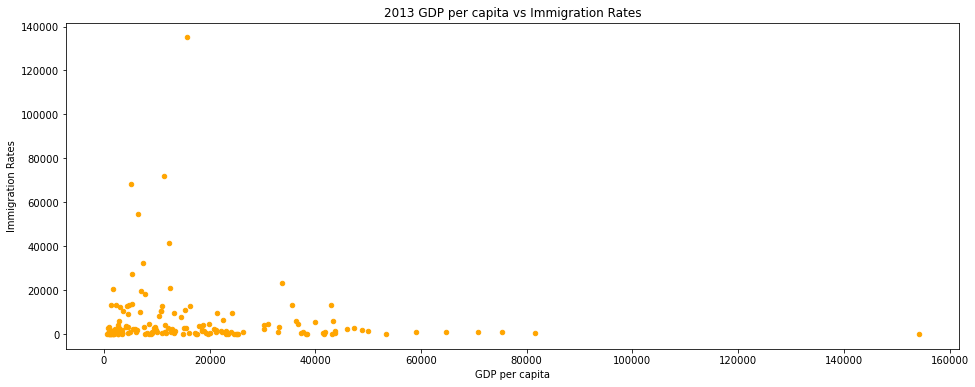

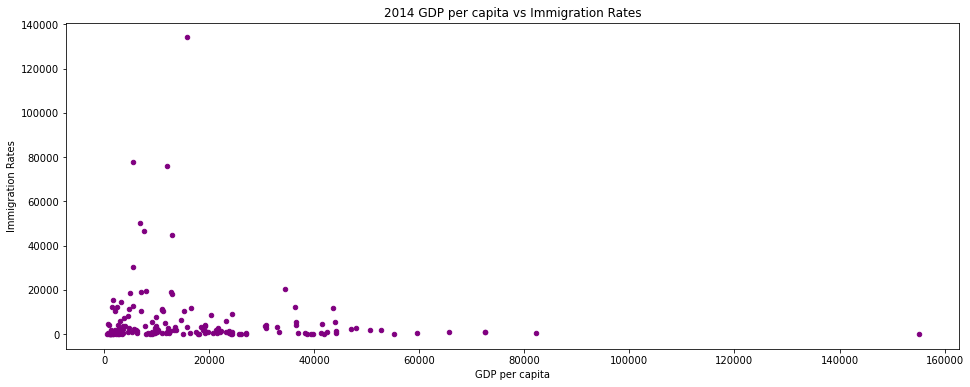

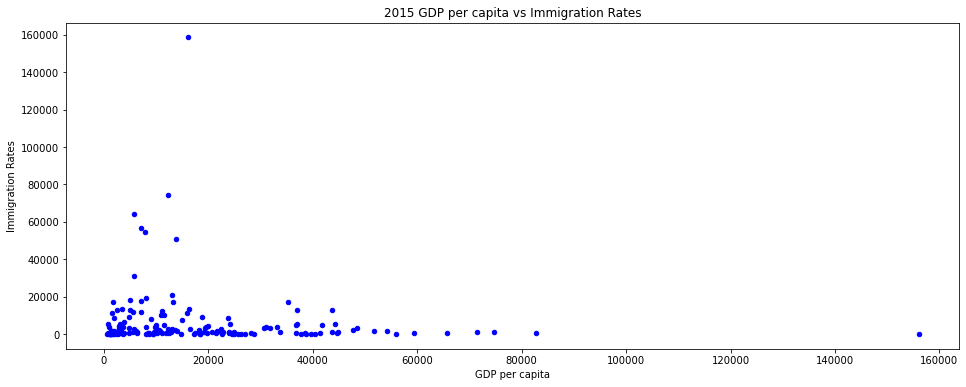

In [15]:
# plot 2013
p1 = immigration_data.plot.scatter(x = '2013 GDP per capita', y = 'num_Im_2013', title = '2013 GDP per capita vs Immigration Rates', figsize = (16,6), color='orange')
p1.set_xlabel('GDP per capita')
p1.set_ylabel('Immigration Rates')

# plot 2014
p2 = immigration_data.plot.scatter(x = '2014 GDP per capita', y = 'num_Im_2014', title = '2014 GDP per capita vs Immigration Rates', figsize = (16,6), color='purple')
p2.set_xlabel('GDP per capita')
p2.set_ylabel('Immigration Rates')

# plot 2015
p3 = immigration_data.plot.scatter(x = '2015 GDP per capita', y = 'num_Im_2015', title = '2015 GDP per capita vs Immigration Rates', figsize = (16,6), color='blue')
p3.set_xlabel('GDP per capita')
p3.set_ylabel('Immigration Rates')

### Correlation Matrix

## Hypothesis Testing
* null hypothesis is it is just as likely for people from any country to immigrant regardless of the country's wealth

## Final Thoughts

Possible things to consider: remember, we removed some countries at the start

## Additional Resources
Of course, this tutorial is only meant to serve as a launching pad. If you would like to learn more, please check out the following links!

**Articles**<br>
* We read this really interesting article from [FiveThirtyEight](https://fivethirtyeight.com/features/what-the-fox-knows/) at the beginning of the semester and if you want to learn more about Data Science, it would be a great place to start
* For more statistics on US immigrants read this article on [Key findings about U.S. immigrants](https://www.pewresearch.org/fact-tank/2020/08/20/key-findings-about-u-s-immigrants/)
* For more information on immigrants around the world, visit [this article](https://www.weforum.org/agenda/2019/03/which-countries-have-the-most-immigrants-51048ff1f9/)
* [The UN](https://www.un.org/en/development/desa/population/migration/data/index.asp) is also a great place to find immigration data

**Other possible factors**
* Human development index data
* Happiness index